# Introduction to Logistic Regression

As you all know I've been doing a article series on machine learning concepts and this is the first article on logistic regression. You can also find the articles on my previous posts, so for more updates follow me on:

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)

# Logictic Regression Basics

## What is Logistic Regression?

`Logistic Regression` is a `classification algorithm` which is used to `predict` the `probability` of a `binary class` or `multiple classes` of a given `input`. 

It is a supervised learning algorithm which means that it is trained on a `labeled dataset` and it can be used to predict the `output` of a given `input`.

> I like to call it the `linear regression` of categorical data.

## How does it work?

Let's say we have a `dataset` like this:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
df = pd.DataFrame(
    data = {
        'Feature' : np.arange(1,101),
        'Target' : np.array([0]*60 + [1]*40)
    }
)

df.head()

,Feature,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Here, I made a very simple data set with `feature` and `target` and If I traina linear regression model on this data, it will give me a regression line like below.

> in the dataset I have the first 60 samples of target set as 0 and rest is set to 1 for better unserstanding.

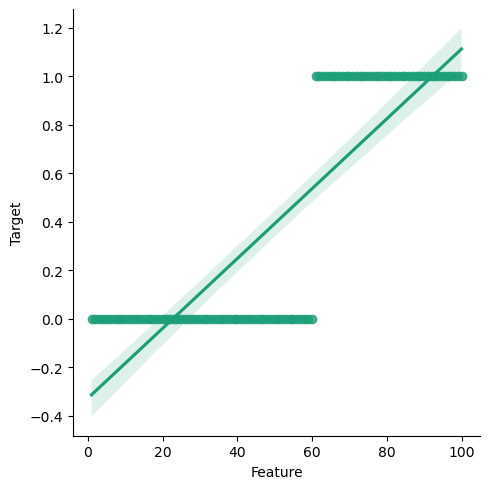

In [2]:
import seaborn as sns
sns.set_palette('Dark2')
sns.lmplot(x='Feature', y='Target', data=df)

Now, this is not a bas model. We can clearly see that it is trying to predict the the values from `0` to `1` and the prediction sometimes can be fractional.

But the huge problem is that the categorical variables cannot be converted into numbers. And there is another issue that if you look closely at the regression line, right aroung the value of `20` of the feature `axis` the value is less than `0` which is not possible, what does negetive category even mean?

So, we need a clear way to predict categorical values and no more fractions or negative values.

### Sigmoid

I don't know if you ever heard of the `sigmoid function`. It is a non-linear function that takes a input and transforms it into `0` to `1` range. 

The `sigmoid function` is defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Here, $x$ is the input and $\sigma(x)$ is the output.

Now, what does this function has to do with the `logistic regression`? Well, the `sigmoid function` is used to transform the input into the output. So, if you have a `feature` that is `categorical` and you want to predict it in the `0` to `1` range, you can use the `sigmoid function` to transform the input of a `linear regression` into the output from `0` to `1` range.

This is how a sigmoid function looks like:
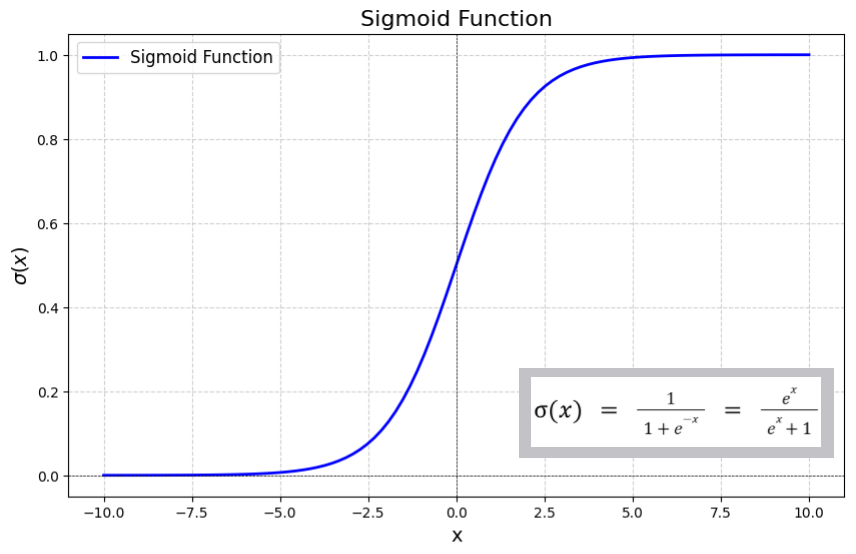

This is used because this represents the probalility of the `feature` being `1` or `0` and sometimes the probability can be a fractional value but it is for a very small range of the feature values.

So, what we can do is set a cutoff value for the `sigmoid function` like `0.5`. If the probability is greater than `0.5` then the value is `1` and if the probability is less than `0.5` then the value is `0`.

So, how do we use this function in the `logistic regression`? 

### Sigmoid to Logistic Regression

So, previously we learned that the sigmoid function can transform the input of any value into the output from `0` to `1` range and it represents the probability of the `feature` being `1` or `0`. So, we can use this function to transform the input of the `linear regression` into the output from `0` to `1` range too.

So, the regression line is now:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

As, $x$ is the input and $\sigma(x)$ is the output, we can replce $x$ with the equation of the `linear regression` and get the equation of the `logistic regression`.

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(\hat{y})}}
$$

Where $\hat{y}$ is the output of the `linear regression`. So, the final equation of the `logistic regression` is:

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}
$$

or more simply:

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(mx + c)}}
$$

Here, $\beta_0$ or `c` is the intercept and $\beta_1$ or `m` is the slope of the regression line.

And we have a clear equation of the `logistic regression` now.

> The sigmoid function is also know as the `logistic function` and that's where the name `logistic regression` comes from.

So, if we combine the two equations in a graph we should get something like this:

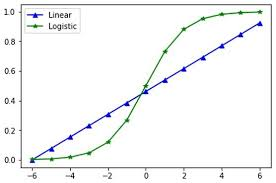


In [ ]:
df_jitter = df.copy()
df_jitter["Target"] = df_jitter["Target"] + np.random.normal(0, 0.03, size=len(df))
df_jitter["Target"] = df_jitter["Target"].clip(0, 1)

> Ps: for demostrating the code logistic regression line with linear regression line, I have to add some noise to the data. 

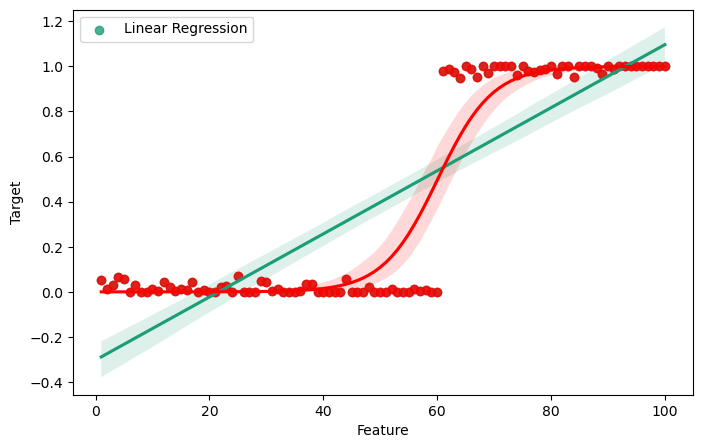

In [20]:
plt.figure(figsize=(8, 5))

# Linear regression
sns.regplot(
    x="Feature",
    y="Target",
    data=df_jitter,
    label="Linear Regression"
)

# Logistic regression (sigmoid)
sns.regplot(
    x="Feature",
    y="Target",
    data=df_jitter,
    logistic=True,
    color="red",
)

plt.legend()
plt.show()


> To use the logistic argument in the code, you need to install the `statsmodels` library. you can install it using conda by running `conda install statsmodels` 

And that's it. So, we can clearly see that logistic regression is transforming the `regression` line into a `logistic function`. 

And we can now use this concept to do `binary classification` and `multiclass classification`.

> Multiclass classification is more complecated than binary classification with logistic regression because the sigmoid function is defined for only one value. 

I hope you unserstand the concept of `logistic regression` and now we can train pracitcally train a model with `logistic regression`.